# SIC - California Housing Prices

### Imports & configs

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import r2_score, mean_absolute_error , mean_absolute_percentage_error, mean_squared_error

### Read Data

In [3]:
df = pd.read_csv("housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


### Data Preprocessing

In [5]:
# Missing Data
total = df.shape[0]
missing_columns = [col for col in df.columns if df[col].isnull().sum() > 0]
for col in missing_columns:
    null_count = df[col].isnull().sum()
    per = (null_count/total) * 100
    print(f"{col}: {null_count} ({round(per, 3)}%)")


total_bedrooms: 207 (1.003%)


In [6]:
# Duplicates
df.duplicated().sum()

0

#### Imputation using KNN

In [5]:
df_imp = df.copy()
df_imp = df_imp.drop("median_house_value", axis=1)

In [6]:
numerical_features = [col for col in df_imp.columns if df_imp[col].dtype != 'object']
df_imp = df_imp[numerical_features]

In [7]:
knn = KNNImputer(n_neighbors = 3)

knn.fit(df_imp)

KNNImputer(n_neighbors=3)

In [8]:
X = knn.transform(df_imp)
df_imp = pd.DataFrame(X, columns = numerical_features)

df_imp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


------------------------------
total_bedrooms:


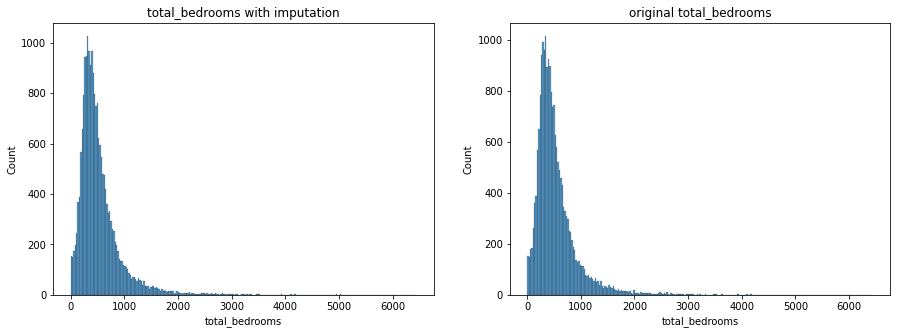

In [9]:
for feature in numerical_features:
    if feature in ["total_bedrooms"]:
        print('-'*30)
        print(f"{feature}:")
        fig, axes = plt.subplots(1, 2, figsize=(15, 5))
        sns.histplot(ax=axes[0], data=df_imp, x=feature)
        axes[0].set_title(f"{feature} with imputation")
        sns.histplot(ax=axes[1], data=df, x=feature)
        axes[1].set_title(f"original {feature}")
        plt.show()

In [10]:
df_imp[df.isna().any(axis=1)]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
290,-122.16,37.77,47.0,1256.0,221.000000,570.0,218.0,4.3750
341,-122.17,37.75,38.0,992.0,241.000000,732.0,259.0,1.6196
538,-122.28,37.78,29.0,5154.0,1328.000000,3741.0,1273.0,2.5762
563,-122.24,37.75,45.0,891.0,162.666667,384.0,146.0,4.9489
696,-122.10,37.69,41.0,746.0,171.666667,387.0,161.0,3.9063
...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18.0,3620.0,923.666667,3171.0,779.0,3.3409
20268,-119.18,34.19,19.0,2393.0,753.000000,1938.0,762.0,1.6953
20372,-118.88,34.17,15.0,4260.0,632.000000,1701.0,669.0,5.1033
20460,-118.75,34.29,17.0,5512.0,855.333333,2734.0,814.0,6.6073


#### Merge imputed numerical features with categorical features

In [11]:
for column in df_imp.columns:
    df[column] = df_imp[column]

#### Label encoding 

In [12]:
le = LabelEncoder()

df['ocean_proximity'] = le.fit_transform(df['ocean_proximity'])

In [13]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3


### Handling Outliers

------------------------------
housing_median_age:


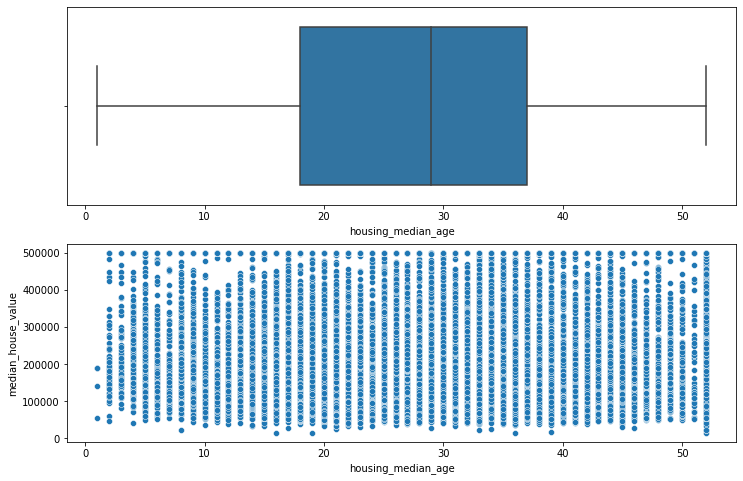

------------------------------
total_rooms:


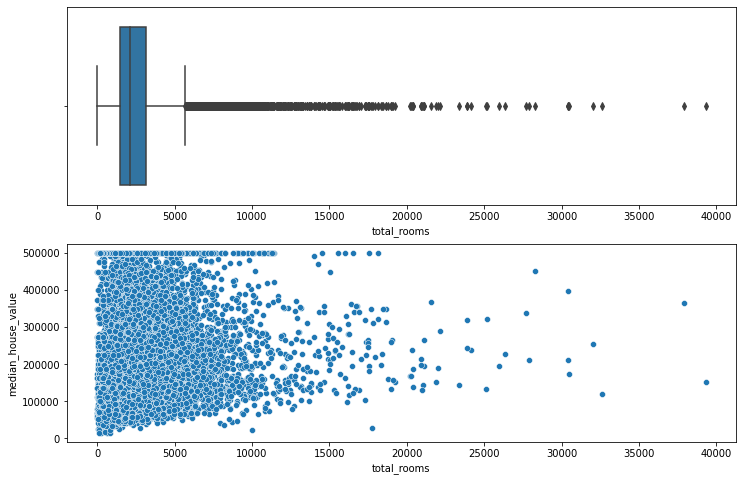

------------------------------
total_bedrooms:


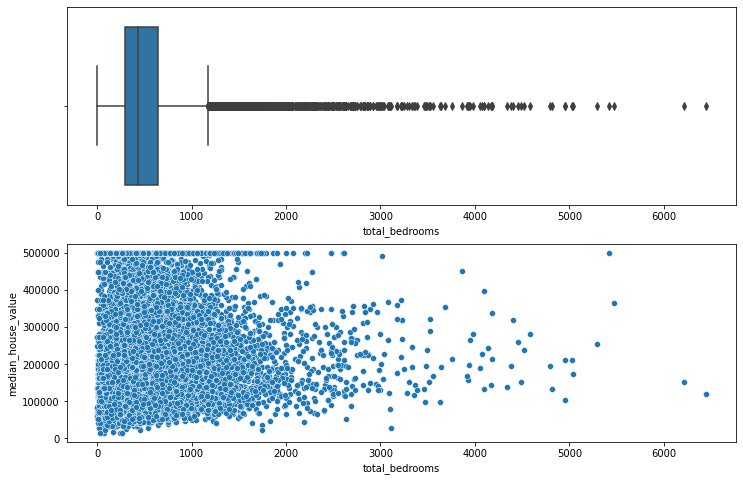

------------------------------
population:


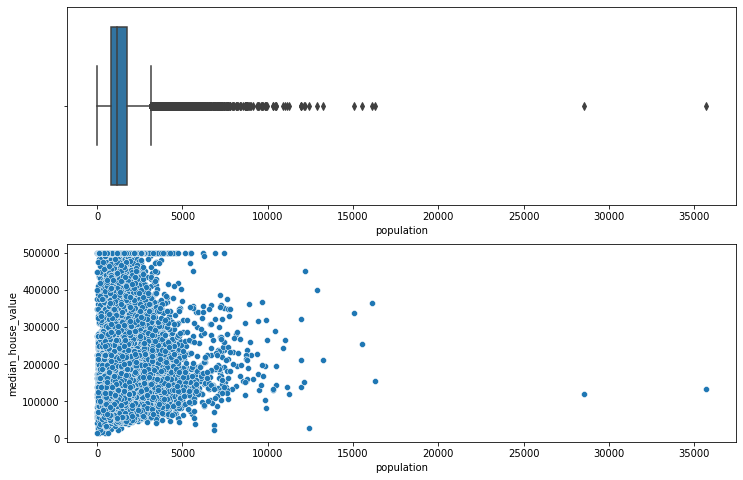

------------------------------
households:


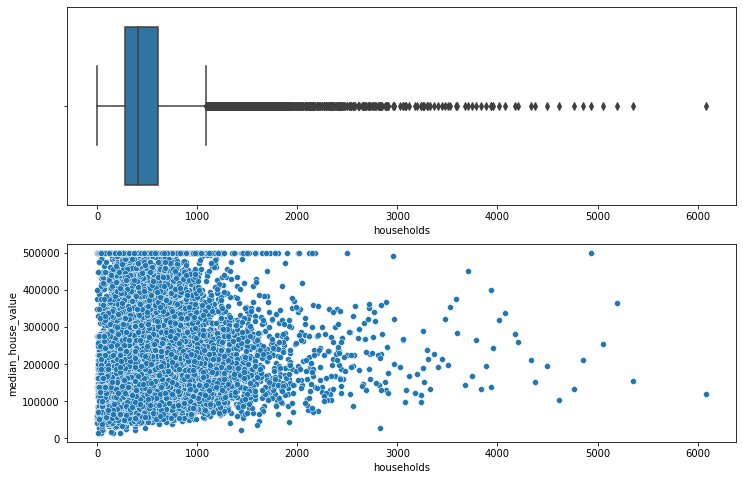

------------------------------
median_income:


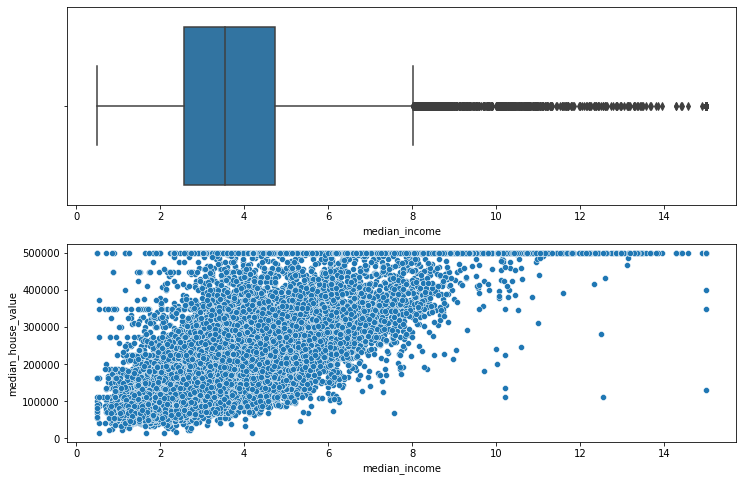

In [14]:
for col in df:
    if col != 'median_house_value' and col in ['total_bedrooms', 'total_rooms', 'housing_median_age', 'population', 'households', 'median_income']:
        # Handle outliers using IQR
        # q1 = df[col].describe()[4] 
        # q3 = df[col].describe()[6]
        # IQR = q3 - q1
        # l = q3 + 1.5*IQR
        # u = q1 - 1.5*IQR
        # df[col].mask(df[col] > l, l, inplace=True)
        # df[col].mask(df[col] < u, u, inplace=True)
        print('-'*30)
        print(f"{col}:")
        fig, ax = plt.subplots(2, 1, figsize=(12, 8))
        g1 = sns.boxplot(x = df[col], ax=ax[0])
        g2 = sns.scatterplot(data=df, x=df[col],y=df['median_house_value'], ax=ax[1])
        plt.show()

In [15]:
valid_data = {'total_rooms': 12500, 'total_bedrooms': 2500, 'population': 8000, 'households': 2200, 'median_income': 10}

for k in valid_data:
    print(f'Number of outliers for {k} is {df[df[k] >= valid_data[k]].shape[0]}')

for k in valid_data:
    df = df[df[k] < valid_data[k]]

Number of outliers for total_rooms is 158
Number of outliers for total_bedrooms is 143
Number of outliers for population is 60
Number of outliers for households is 154
Number of outliers for median_income is 309


### Feature selection

<AxesSubplot:>

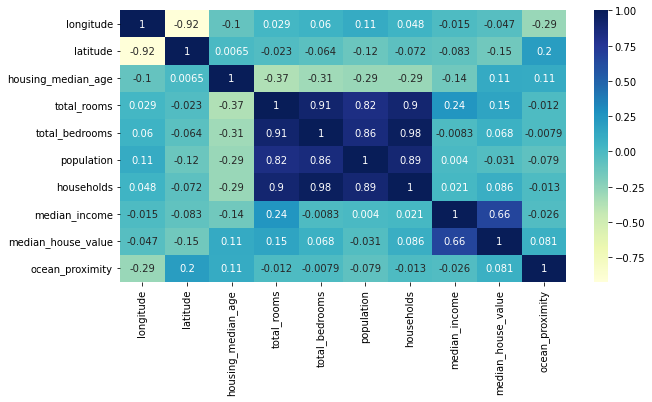

In [16]:
plt.figure(figsize = (10, 5))
sns.heatmap(df.corr() , annot = True , cmap = "YlGnBu")

In [17]:
x = df[['housing_median_age', 'households', 'median_income', 'ocean_proximity']].values
y = df['median_house_value'].values

In [18]:
feature = PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)
x = feature.fit_transform(x)

scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
x = scaler.fit_transform(x)

In [19]:
x_train , x_test , y_train , y_test = train_test_split(x, y, test_size= 0.20, random_state=7)

In [20]:
print(f"Train size: {x_train.shape[0]}")
print(f"Test size: {x_test.shape[0]}")

Train size: 16100
Test size: 4026


## Modeling

### Linear Regression 

In [21]:
model = linear_model.LinearRegression()

model.fit(x_train, y_train)

print(f"Train score: {model.score(x_train, y_train)}")
print(f"Test score: {model.score(x_test, y_test)}")

Train score: 0.6173277726834385
Test score: 0.6219108178807152


In [22]:
y_pred = model.predict(x_test)
df_pred = pd.DataFrame({"Y_test": y_test , "Y_pred" : y_pred})
df_pred.head(10)

,Y_test,Y_pred
0,177100.0,194150.545323
1,119300.0,181968.783258
2,191800.0,209205.584768
3,337500.0,222391.432116
4,66700.0,87182.979137
5,152800.0,121351.352382
6,249000.0,326816.657665
7,161900.0,237518.217322
8,98500.0,210769.694106
9,96300.0,98444.522763


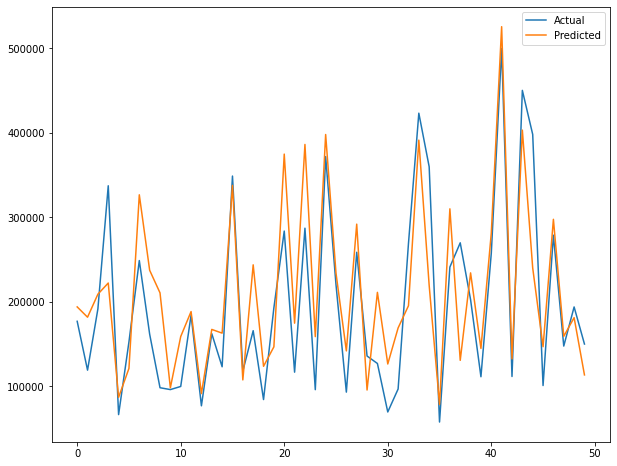

In [23]:
plt.figure(figsize=(10,8))
plt.plot(df_pred[:50])
plt.legend(["Actual" , "Predicted"])

### Linear Regression Model Evaluation  

In [24]:
reg_score = r2_score(y_test , y_pred)
p = len(x_train[0])
n = len(y_train)
adj_R1 = 1-(1-reg_score)*(n-1)/(n-p-1)
adj_R1
print(f'Reg Score: {reg_score}')
print(f'Adjusted R1: {adj_R1}')
print(f'Valid: {adj_R1 < reg_score}')

Reg Score: 0.6219108178807152
Adjusted R1: 0.621087042894773
Valid: True


In [25]:
rmse = np.sqrt(mean_squared_error(y_test , y_pred))
mse = mean_squared_error(y_test , y_pred)
mape = mean_absolute_percentage_error(y_test , y_pred)
mae = mean_absolute_error(y_test , y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Error: {mae}')
print(f'Mean Absolute Percentage Error: {mape}')

Mean Squared Error: 4601175586.687177
Root Mean Squared Error: 67831.9658176525
Mean Absolute Error: 48708.19824434848
Mean Absolute Percentage Error: 0.2812548473576564


### Ridge Regression 

In [26]:
model = linear_model.Ridge(alpha=0.9)

model.fit(x_train, y_train)

print(f"Train score: {model.score(x_train, y_train)}")
print(f"Test score: {model.score(x_test, y_test)}")

Train score: 0.6172243997433882
Test score: 0.6216213783098821


In [27]:
y_pred = model.predict(x_test)
df_pred = pd.DataFrame({"Y_test": y_test , "Y_pred" : y_pred})
df_pred.head(10)

,Y_test,Y_pred
0,177100.0,193849.848373
1,119300.0,182217.978166
2,191800.0,209466.692074
3,337500.0,221661.216873
4,66700.0,88095.547318
5,152800.0,122929.983049
6,249000.0,329041.071614
7,161900.0,237731.455666
8,98500.0,211338.114195
9,96300.0,99746.213405


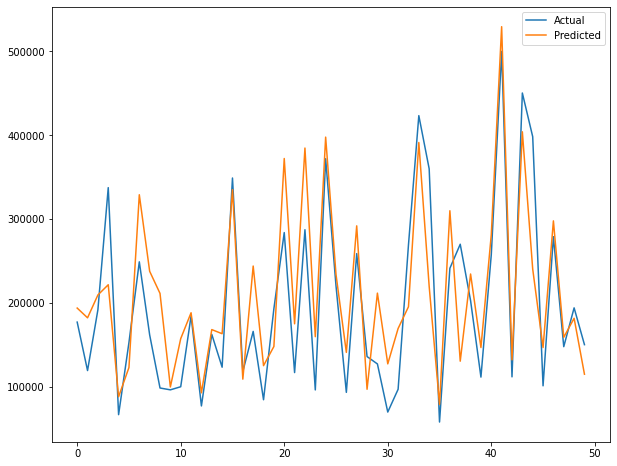

In [28]:
plt.figure(figsize=(10,8))
plt.plot(df_pred[:50])
plt.legend(["Actual" , "Predicted"])

### Ridge Regression Model Evaluation  

In [29]:
reg_score = r2_score(y_test , y_pred)
p = len(x_train[0])
n = len(y_train)
adj_R1 = 1-(1-reg_score)*(n-1)/(n-p-1)
adj_R1
print(f'Reg Score: {reg_score}')
print(f'Adjusted R1: {adj_R1}')
print(f'Valid: {adj_R1 < reg_score}')

Reg Score: 0.6216213783098821
Adjusted R1: 0.620796972697385
Valid: True


In [30]:
rmse = np.sqrt(mean_squared_error(y_test , y_pred))
mse = mean_squared_error(y_test , y_pred)
mape = mean_absolute_percentage_error(y_test , y_pred)
mae = mean_absolute_error(y_test , y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Error: {mae}')
print(f'Mean Absolute Percentage Error: {mape}')

Mean Squared Error: 4604697936.307639
Root Mean Squared Error: 67857.92463896637
Mean Absolute Error: 48735.686639764375
Mean Absolute Percentage Error: 0.2816552309694342


### Lasso Regression 

In [31]:
model = linear_model.Lasso(alpha=0.9)

model.fit(x_train, y_train)

print(f"Train score: {model.score(x_train, y_train)}")
print(f"Test score: {model.score(x_test, y_test)}")

Train score: 0.6154627072421339
Test score: 0.6184421864563994


/home/ahmed/python-venv/ML-TensorFlow/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.751e+13, tolerance: 1.989e+10
  model = cd_fast.enet_coordinate_descent(


In [32]:
y_pred = model.predict(x_test)
df_pred = pd.DataFrame({"Y_test": y_test , "Y_pred" : y_pred})
df_pred.head(10)

,Y_test,Y_pred
0,177100.0,193513.807654
1,119300.0,181899.155641
2,191800.0,209756.313553
3,337500.0,222201.760357
4,66700.0,88550.334995
5,152800.0,125479.735262
6,249000.0,325658.490370
7,161900.0,239666.874292
8,98500.0,211022.637193
9,96300.0,100391.067637


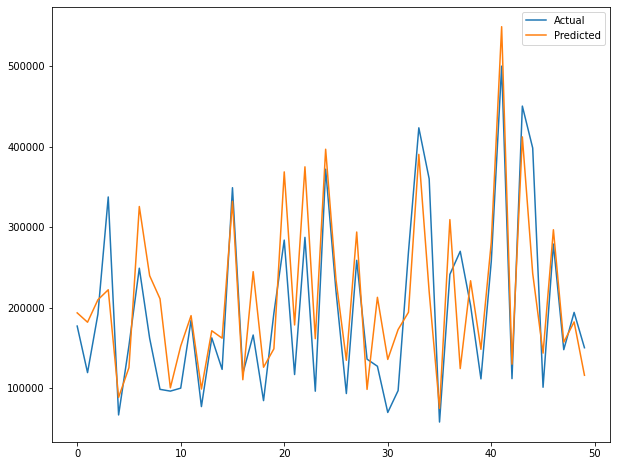

In [33]:
plt.figure(figsize=(10,8))
plt.plot(df_pred[:50])
plt.legend(["Actual" , "Predicted"])

### Lasso Regression Model Evaluation  

In [34]:
reg_score = r2_score(y_test , y_pred)
p = len(x_train[0])
n = len(y_train)
adj_R1 = 1-(1-reg_score)*(n-1)/(n-p-1)
adj_R1
print(f'Reg Score: {reg_score}')
print(f'Adjusted R1: {adj_R1}')
print(f'Valid: {adj_R1 < reg_score}')

Reg Score: 0.6184421864563994
Adjusted R1: 0.617610854068823
Valid: True


In [35]:
rmse = np.sqrt(mean_squared_error(y_test , y_pred))
mse = mean_squared_error(y_test , y_pred)
mape = mean_absolute_percentage_error(y_test , y_pred)
mae = mean_absolute_error(y_test , y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Error: {mae}')
print(f'Mean Absolute Percentage Error: {mape}')

Mean Squared Error: 4643387273.727044
Root Mean Squared Error: 68142.404372953
Mean Absolute Error: 48989.733738664276
Mean Absolute Percentage Error: 0.284534710996941
